In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.utils import np_utils
import re
# from keras.preprocessing import sequence
# from keras.preprocessing.text import text_to_word_sequence
# from keras.preprocessing.text import one_hot
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [2]:
names=['URL','Category']
df=pd.read_csv('URL Classification.csv',names=names, na_filter=False)
dataset = df[:]

In [3]:
adult = dataset[1:2000]
arts = dataset[50000:52000]
business = dataset[520000:522000]
computers = dataset[535300:537300]
games = dataset[650000:652000]
health = dataset[710000:712000]
home =  dataset[764200:766200]
kids =  dataset[793080:795080]
news =  dataset[839730:841730]
recreation =  dataset[850000:852000]
reference =  dataset[955250:957250]
science =  dataset[1013000:1015000]
shopping =  dataset[1143000:1145000]
society =  dataset[1293000:1295000]
sports =  dataset[1492000:1494000]

test_data = pd.concat([adult, arts, business, computers, games, health, home, 
              kids, news, recreation, reference,science, shopping, society, sports], axis=0)

dataset.drop(dataset.index[1:2000],inplace= True)
dataset.drop(dataset.index[50000:52000],inplace= True)
dataset.drop(dataset.index[520000:522000],inplace= True)
dataset.drop(dataset.index[535300:537300],inplace= True)
dataset.drop(dataset.index[650000:652000],inplace= True)
dataset.drop(dataset.index[710000:712000],inplace= True)
dataset.drop(dataset.index[764200:766200],inplace= True)
dataset.drop(dataset.index[793080:795080],inplace= True)
dataset.drop(dataset.index[839730:841730],inplace= True)
dataset.drop(dataset.index[850000:852000],inplace= True)
dataset.drop(dataset.index[955250:957250],inplace= True)
dataset.drop(dataset.index[1013000:1015000],inplace= True)
dataset.drop(dataset.index[1143000:1145000],inplace= True)
dataset.drop(dataset.index[1293000:1295000],inplace= True)
dataset.drop(dataset.index[1492000:1494000],inplace= True)
dataset.tail()

C:\Users\tmachine\AppData\Local\Temp\ipykernel_2064\3423605945.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset.index[1:2000],inplace= True)
C:\Users\tmachine\AppData\Local\Temp\ipykernel_2064\3423605945.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset.index[50000:52000],inplace= True)
C:\Users\tmachine\AppData\Local\Temp\ipykernel_2064\3423605945.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,URL,Category
1563306,,
1563307,,
1563308,,
1563309,,
1563310,,


Text(0, 0.5, 'Total Number Of Individual Category')

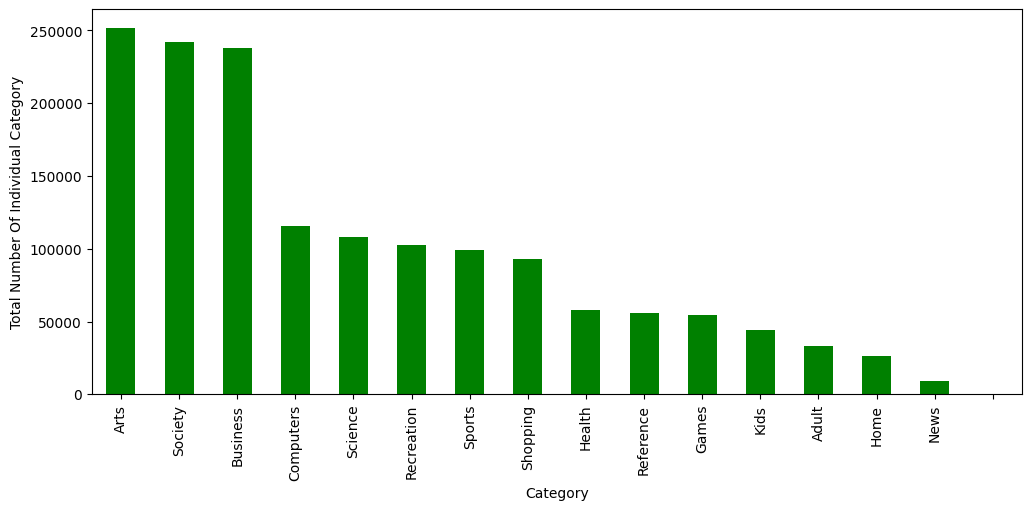

In [4]:
dataset.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

,URL,Category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult


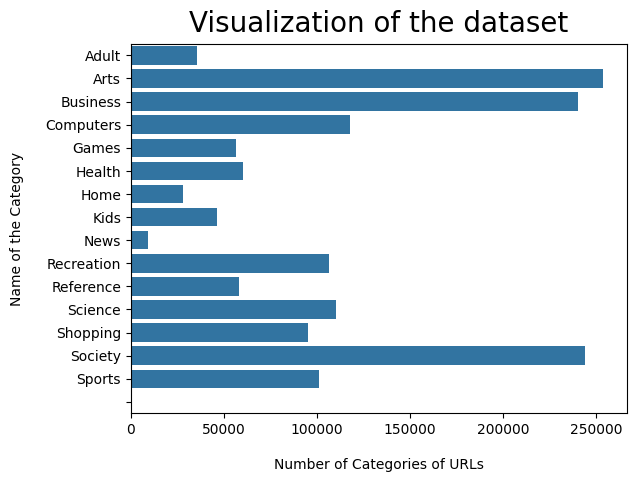

In [5]:
import seaborn as sns
ax = sns.countplot(y="Category",  data=df )
plt.title("Visualization of the dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)
df[:2]

Text(0.5, 0, 'Number of Categories of URLs')

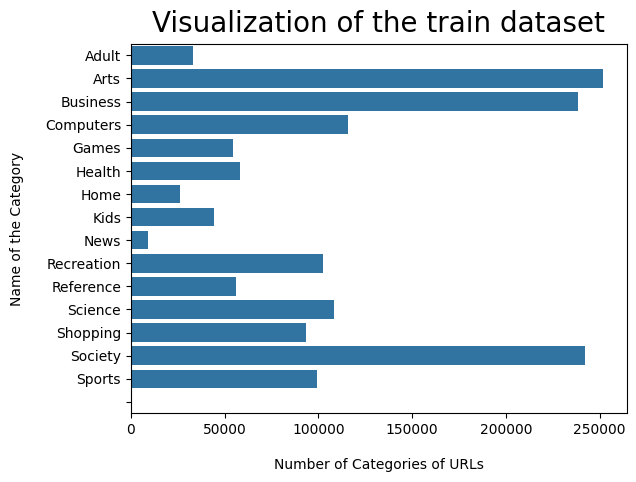

In [6]:
ax = sns.countplot(y = "Category",  data = dataset )
plt.title("Visualization of the train dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

Text(0, 0.5, 'Total Number Of Individual Category')

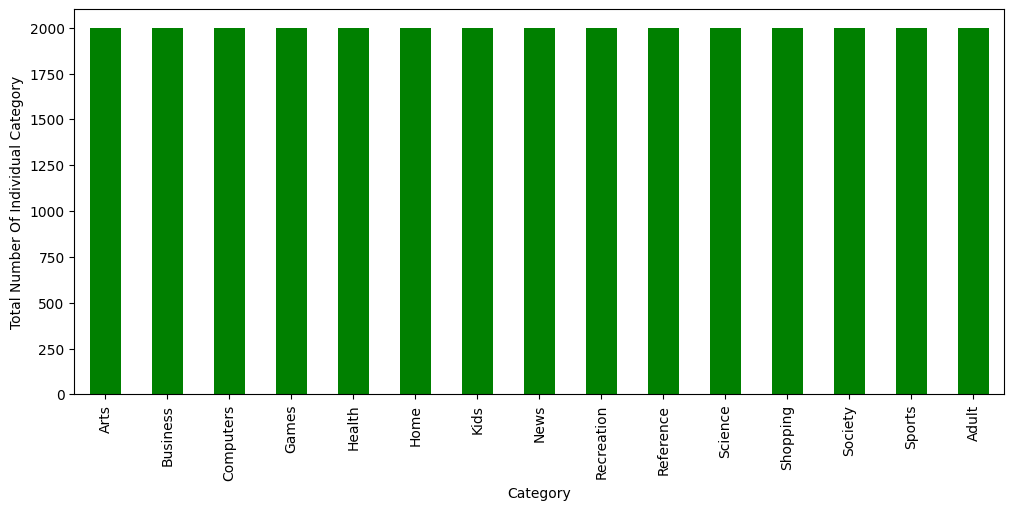

In [7]:
test_data.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

Text(0.5, 0, 'Number of Categories of URLs')

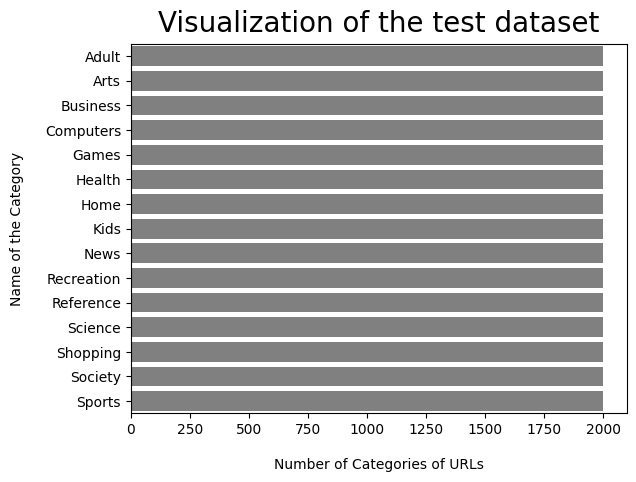

In [8]:
ax = sns.countplot(y = "Category",  data = test_data , color = 'gray')
plt.title("Visualization of the test dataset", y=1.01, fontsize=20)
plt.ylabel("Name of the Category", labelpad=15)
plt.xlabel("Number of Categories of URLs", labelpad=15)

In [9]:
X_train=dataset['URL']
y_train=dataset['Category']
#print(X_train)
X_train.shape

(1533312,)

In [10]:
X_test=test_data['URL']
y_test=test_data['Category']
#print(X_test)
X_test.shape

(29999,)

In [11]:
import re
from sklearn.pipeline import Pipeline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english', ngram_range=(3,3))

#count_vect = CountVectorizer(stop_words='english', ngram_range=(1,1))
gs_clf = Pipeline([('vect', stemmed_count_vect),
                   ('tfidf', TfidfTransformer()),
                   ('clf', SGDClassifier(loss='perceptron', penalty='l2',
                    alpha =1e-4 , max_iter=20 ,tol=None)),
   ])
gs_clf = gs_clf.fit(X_train, y_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tmachine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

c:\Users\tmachine\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.9506737416500649, 0.9021300710023668, 0.9050955788386023, None)

In [13]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

                 0.0000    0.0000    0.0000         0
       Adult     0.9678    0.1506    0.2606      1999
        Arts     0.7911    0.9545    0.8652      2000
    Business     0.9449    0.9955    0.9696      2000
   Computers     0.9703    0.9790    0.9746      2000
       Games     0.9826    0.9855    0.9840      2000
      Health     0.9945    0.9900    0.9922      2000
        Home     0.9867    0.9675    0.9770      2000
        Kids     0.8723    0.8130    0.8416      2000
        News     0.9994    0.8290    0.9063      2000
  Recreation     0.9850    0.9835    0.9842      2000
   Reference     0.9443    0.9405    0.9424      2000
     Science     0.9853    0.9710    0.9781      2000
    Shopping     0.9840    0.9840    0.9840      2000
     Society     0.8837    0.9995    0.9381      2000
      Sports     0.9682    0.9885    0.9782      2000

    accuracy                         0.9021     29999
   macro avg     0.8913   

c:\Users\tmachine\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tmachine\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tmachine\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

C:\Users\tmachine\AppData\Local\Temp\ipykernel_2064\2331353874.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


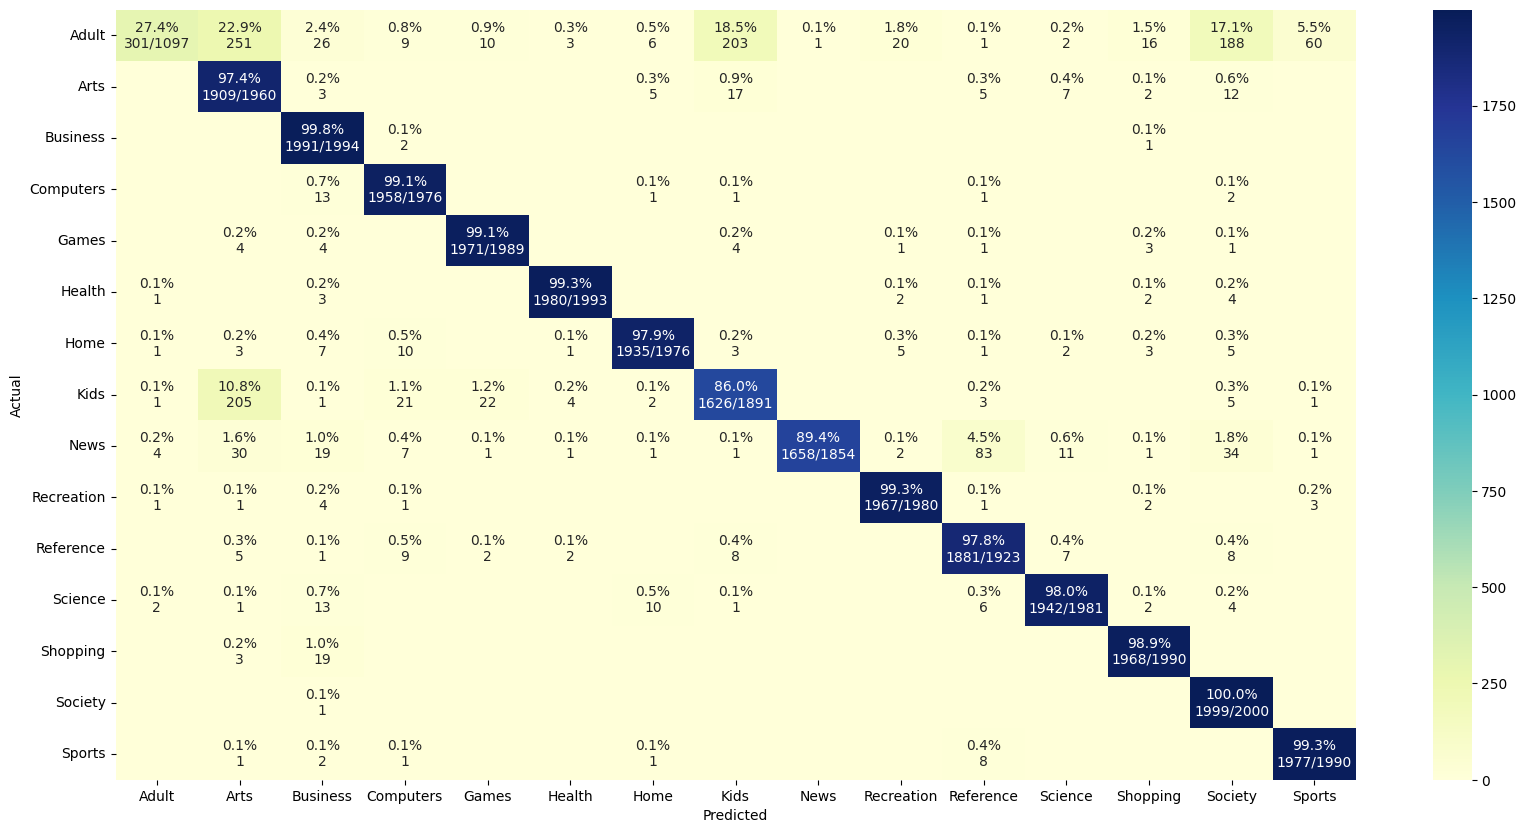

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(20,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

plot_cm(y_test, y_pred)

In [17]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9733257158360464
Naive Bayes Test Accuracy =  0.9021300710023668


In [19]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/']))
print(gs_clf.predict(['http://www.excelsports.net']))
print(gs_clf.predict(['http://www.eresgay.com/pierced&amp;tattooedmales/']))
print(gs_clf.predict(["http://www.snyderhoffman.com/"]))

['Business']
['Games']
['Recreation']
['Adult']
['Business']


In [25]:
import pickle

# save the model to disk
filename = 'model.sav'
pickle.dump(gs_clf, open(filename, 'wb'))

In [24]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(['http://www.excelsports.net'])
result

array(['Recreation'], dtype='<U10')